In [41]:
%load_ext autoreload
%autoreload 2

import os
import cv2
import matplotlib.pyplot as plt
from attention.img_proc.img_process import *
from attention.img_proc.img_split import *
from attention.models.face_models import *
from attention.utils.img_plot import *
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
image_name = "IMG_3288 2 copy.jpg"
image_path = os.path.join(os.path.expanduser('~'), "Desktop", "IMG_3288 2 copy.jpg")

In [43]:
image = cv2_process(image_path)
# plt.imshow(image)

In [44]:
n_split_w = 12
n_split_h = 12
crops = split_image(image, n_split_w, n_split_h, 0.02, 0.02)
# show_crops(crops)

In [45]:
bbox_crop_list = []
bbox_crop_list_origin = []
for crop in crops:
    coord_set = detect_face(crop.image)
    bbox_crop_list.append(coord_set)
    coord_set_origin = reconstruct_coord(crop, coord_set)
    bbox_crop_list_origin.append(coord_set_origin)
bbox_crop_list_origin

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [{'x1': 776, 'x2': 899, 'y1': 1480, 'y2': 1613}],
 [{'x1': 1301, 'x2': 1404, 'y1': 1476, 'y2': 1569}],
 [{'x1': 1317, 'x2': 1388, 'y1': 1476, 'y2': 1571}],
 [],
 [],
 [],
 [],
 [{'x1': 3129, 'x2': 3253, 'y1': 1402, 'y2': 1529}],
 [],
 [],
 [],
 [],
 [{'x1': 776, 'x2': 900, 'y1': 1494, 'y2': 1602}],
 [{'x1': 1301, 'x2': 1403, 'y1': 1491, 'y2': 1557}],
 [{'x1': 1315, 'x2': 1388, 'y1': 1488, 'y2': 1559}],
 [],
 [],
 [{'x1': 2645, 'x2': 2728, 'y1': 1552, 'y2': 1605}],
 [{'x1': 2886, 'x2': 2948, 'y1': 1475, 'y2': 1508}],
 [],
 [{'x1': 3483, 'x2': 3622, 'y1': 1527, 'y2': 1652}],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],

In [46]:
crops_annotated = []
for i in range(len(crops)):
    crop_annotated = copy.copy(crops[i])
    crop_annotated.image = output_image_bboxes(crop_annotated.image, bbox_crop_list[i])
    crops_annotated.append(crop_annotated)
# show_crops(crops_annotated)

In [47]:
bbox_list = bbox_merge(bbox_crop_list_origin)
bbox_list

[{'x1': 776, 'x2': 899, 'y1': 1480, 'y2': 1613},
 {'x1': 1301, 'x2': 1404, 'y1': 1476, 'y2': 1569},
 {'x1': 3129, 'x2': 3253, 'y1': 1402, 'y2': 1529},
 {'x1': 2645, 'x2': 2728, 'y1': 1552, 'y2': 1605},
 {'x1': 2886, 'x2': 2948, 'y1': 1475, 'y2': 1508},
 {'x1': 3483, 'x2': 3622, 'y1': 1527, 'y2': 1652}]

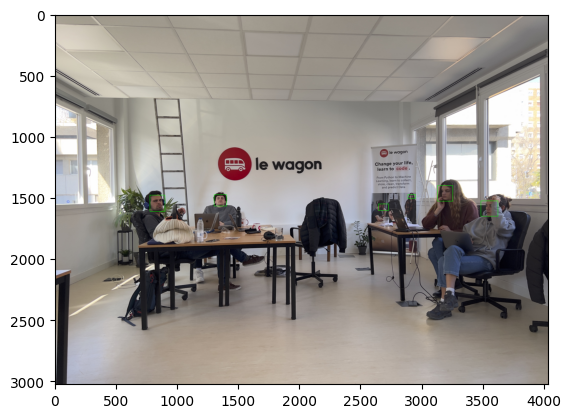

In [48]:
image_output = output_image_bboxes(image, bbox_list)
plt.imshow(image_output)

In [49]:
image_output_rgb = cv2.cvtColor(image_output, cv2.COLOR_RGB2BGR)
output_path = os.path.join(os.path.expanduser('~'), "Desktop", "output")

cv2.imwrite(os.path.join(output_path, image_name), image_output_rgb)

True